# Iphone 12

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Load the iPhone 12 dataset
df_iphone12  = pd.read_csv('/Users/xueyuanli/Desktop/DS-team/Asurion_data_iPhone_v3.csv', parse_dates=['weeks_monday','month_year'])
df_iphone12 = df_iphone12[df_iphone12['phone_generation'] == 'iphone 12']
df_iphone12 = df_iphone12.groupby(['weeks_monday'])['claim'].sum().reset_index()
df_iphone12 = df_iphone12.sort_values(by='weeks_monday')
df_iphone12.set_index('weeks_monday', inplace=True)
df_iphone12

## first and last week abnormally low so drop
df_iphone12= df_iphone12.drop(df_iphone12.index[-1])
df_iphone12=df_iphone12.drop(df_iphone12.index[0])

df_iphone12.plot()

print(df_iphone12.tail(20))


ModuleNotFoundError: No module named 'statsmodels.tsa.arima'

/Users/xueyuanli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


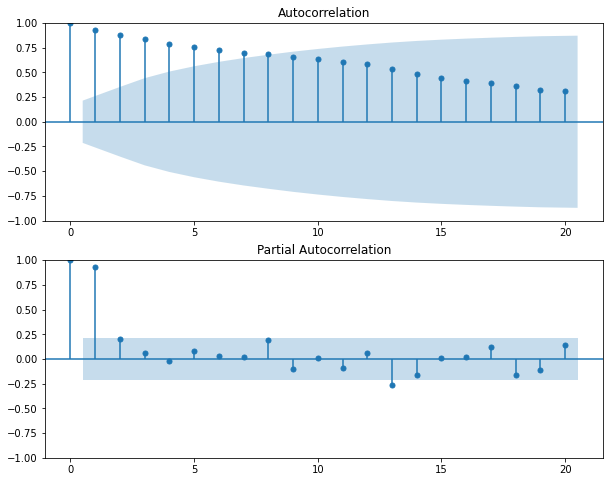

In [57]:
# Plot the ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))
plot_acf(df_iphone12, ax=ax1)
plot_pacf(df_iphone12, ax=ax2)
plt.show()

/Users/xueyuanli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/Users/xueyuanli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/Users/xueyuanli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  claim   No. Observations:                   78
Model:                ARIMA(0, 1, 10)   Log Likelihood                -546.244
Date:                Sat, 25 Mar 2023   AIC                           1114.488
Time:                        11:45:07   BIC                           1140.270
Sample:                    07-05-2021   HQIC                          1124.800
                         - 12-26-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2205      0.381     -0.578      0.563      -0.968       0.527
ma.L2         -0.1170      0.331     -0.354      0.724      -0.765       0.531
ma.L3         -0.1908      0.143     -1.330      0.1

/Users/xueyuanli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


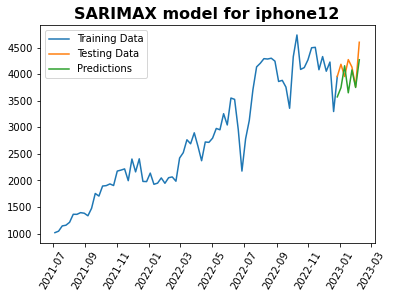

In [116]:
# Split the data into training and testing sets
train_data = df_iphone12.loc['2021-07-05':'2022-12-26']
test_data = df_iphone12.loc['2022-12-26':]
# Fit an ARIMA model to the training data
model = ARIMA(train_data, order=(0,1,10))
model = model.fit()
print(model.summary())


predictions = model.predict(start='2022-12-26', end='2023-02-06')
print(predictions)


# Visualize the predictions
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Testing Data')
plt.plot(predictions, label='Predictions')
plt.title('SARIMAX model for iphone12', fontsize=16, fontweight='bold')
plt.xticks(rotation=60)
plt.legend()
plt.show()


                            AutoReg Model Results                             
Dep. Variable:                  claim   No. Observations:                   78
Model:                    AutoReg(14)   Log Likelihood                -454.737
Method:               Conditional MLE   S.D. of innovations            294.808
Date:                Sat, 25 Mar 2023   AIC                            941.474
Time:                        11:45:03   BIC                            976.016
Sample:                    10-11-2021   HQIC                           955.082
                         - 12-26-2022                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        196.8647    133.525      1.474      0.140     -64.839     458.568
claim.L1       0.6734      0.122      5.501      0.000       0.433       0.913
claim.L2       0.0189      0.166      0.114      0.9

/Users/xueyuanli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/Users/xueyuanli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


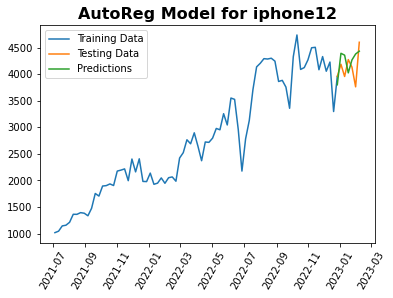

In [115]:
from statsmodels.tsa.ar_model import AutoReg

ar_model = AutoReg(train_data, lags=14).fit()

print(ar_model.summary())
pred = ar_model.predict(start='2022-12-26', end='2023-02-06', dynamic=False)


# Visualize the predictions
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Testing Data')
plt.plot(pred, label='Predictions')
plt.title('AutoReg Model for iphone12', fontsize=16, fontweight='bold')
plt.xticks(rotation=60)
plt.legend()
plt.show()

# Iphone 13

              claim
weeks_monday       
2022-09-26     2721
2022-10-03     2994
2022-10-10     3585
2022-10-17     3424
2022-10-24     3514
2022-10-31     3455
2022-11-07     3426
2022-11-14     3335
2022-11-21     3084
2022-11-28     3528
2022-12-05     3291
2022-12-12     3123
2022-12-19     2312
2022-12-26     2616
2023-01-02     3683
2023-01-09     3616
2023-01-16     3828
2023-01-23     4090
2023-01-30     3740
2023-02-06     4270


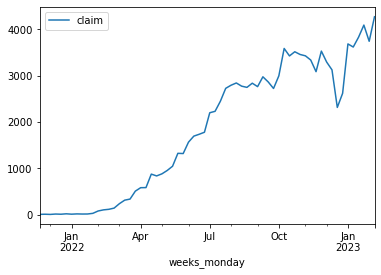

In [147]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Load the iPhone 12 dataset
df_iphone13  = pd.read_csv('/Users/xueyuanli/Desktop/DS-team/Asurion_data_iPhone_v3.csv', parse_dates=['weeks_monday','month_year'])
df_iphone13 = df_iphone13[df_iphone13['phone_generation'] == 'iphone 13']
df_iphone13 = df_iphone13.groupby(['weeks_monday'])['claim'].sum().reset_index()
df_iphone13 = df_iphone13.sort_values(by='weeks_monday')
df_iphone13.set_index('weeks_monday', inplace=True)
df_iphone13

## first and last week abnormally low so drop
df_iphone13= df_iphone13.drop(df_iphone13.index[-1])
df_iphone13=df_iphone13.drop(df_iphone13.index[0])

df_iphone13.plot()

print(df_iphone13.tail(20))

/Users/xueyuanli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


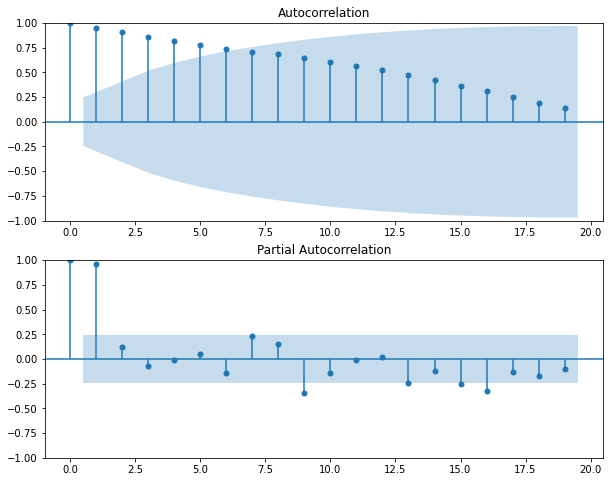

In [148]:
# Plot the ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))
plot_acf(df_iphone13, ax=ax1)
plot_pacf(df_iphone13, ax=ax2)
plt.show()

In [177]:
# Split the data into training and testing sets
train_data = df_iphone13.loc['2022-09-26':'2022-12-26']
test_data = df_iphone13.loc['2022-12-26':]

# Fit an ARIMA model to the training data
model = ARIMA(train_data, order=(0,1,16))
model = model.fit()
print(model.summary())
predictions = model.predict(start='2022-12-26', end='2023-02-06')


from statsmodels.tsa.ar_model import AutoReg
ar_model = AutoReg(train_data, lags=3).fit()
print(ar_model.summary())
pred = ar_model.predict(start='2022-12-26', end='2023-02-06', dynamic=False)



/Users/xueyuanli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/Users/xueyuanli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/Users/xueyuanli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/Users/xueyuanli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/xueyuan

                               SARIMAX Results                                
Dep. Variable:                  claim   No. Observations:                   14
Model:                ARIMA(0, 1, 16)   Log Likelihood                 -89.179
Date:                Sat, 25 Mar 2023   AIC                            212.357
Time:                        12:05:29   BIC                            221.961
Sample:                    09-26-2022   HQIC                           210.383
                         - 12-26-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3213     30.930      0.010      0.992     -60.301      60.944
ma.L2          0.2272     40.387      0.006      0.996     -78.930      79.385
ma.L3         -0.7634     21.589     -0.035      0.9

/Users/xueyuanli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/Users/xueyuanli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


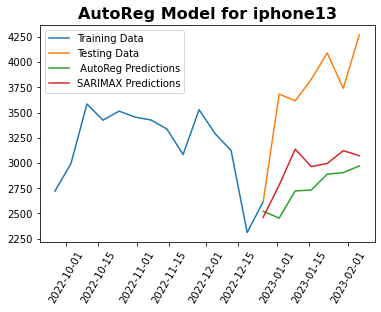

In [178]:
# Visualize the predictions
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Testing Data')
plt.plot(pred, label=' AutoReg Predictions')
plt.plot(predictions, label='SARIMAX Predictions')
plt.title('AutoReg Model for iphone13', fontsize=16, fontweight='bold')
plt.xticks(rotation=60)
plt.legend()
plt.show()

# All Iphone

              claim
weeks_monday       
2022-09-26     9869
2022-10-03    11982
2022-10-10    13746
2022-10-17    12472
2022-10-24    12227
2022-10-31    12565
2022-11-07    12945
2022-11-14    11993
2022-11-21    10678
2022-11-28    12219
2022-12-05    11446
2022-12-12    11395
2022-12-19     9269
2022-12-26    10079
2023-01-02    11461
2023-01-09    11174
2023-01-16    11714
2023-01-23    11603
2023-01-30    10448
2023-02-06    12785


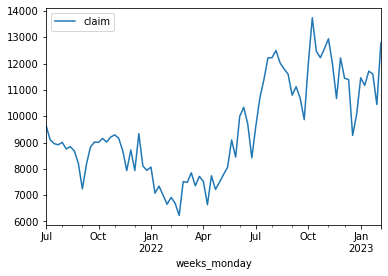

In [128]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Load the iPhone 12 dataset
df_iphone  = pd.read_csv('/Users/xueyuanli/Desktop/DS-team/Asurion_data_iPhone_v3.csv', parse_dates=['weeks_monday','month_year'])
#df_iphone13 = df_iphone13[df_iphone13['phone_generation'] == 'iphone 13']
df_iphone = df_iphone.groupby(['weeks_monday'])['claim'].sum().reset_index()
df_iphone = df_iphone.sort_values(by='weeks_monday')
df_iphone.set_index('weeks_monday', inplace=True)
df_iphone

## first and last week abnormally low so drop
df_iphone= df_iphone.drop(df_iphone.index[-1])
df_iphone=df_iphone.drop(df_iphone.index[0])

df_iphone.plot()

print(df_iphone.tail(20))

/Users/xueyuanli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


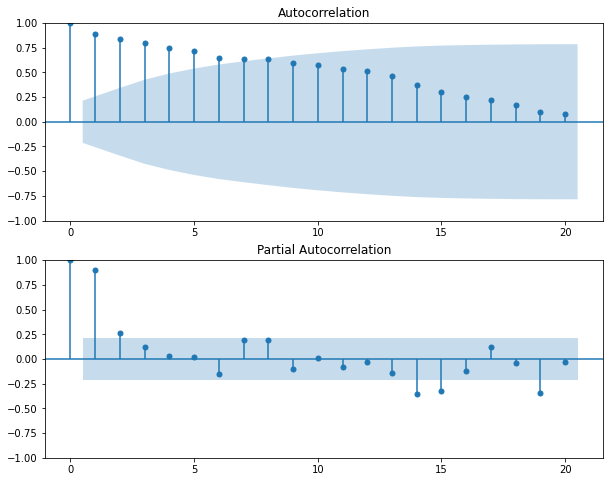

In [129]:
# Plot the ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))
plot_acf(df_iphone, ax=ax1)
plot_pacf(df_iphone, ax=ax2)
plt.show()

In [173]:
# Split the data into training and testing sets
train_data = df_iphone.loc['2022-09-26':'2022-12-26']
test_data = df_iphone.loc['2022-12-26':]
# Fit an ARIMA model to the training data
model = ARIMA(train_data, order=(0,1,14))
model = model.fit()
print(model.summary())
predictions = model.predict(start='2022-12-26', end='2023-02-06')



from statsmodels.tsa.ar_model import AutoReg
ar_model = AutoReg(train_data, lags=2).fit()
print(ar_model.summary())
pred = ar_model.predict(start='2022-12-26', end='2023-02-06', dynamic=False)

/Users/xueyuanli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/Users/xueyuanli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/Users/xueyuanli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/Users/xueyuanli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/xueyuan

                               SARIMAX Results                                
Dep. Variable:                  claim   No. Observations:                   14
Model:                ARIMA(0, 1, 14)   Log Likelihood                -104.533
Date:                Sat, 25 Mar 2023   AIC                            239.066
Time:                        12:04:17   BIC                            247.540
Sample:                    09-26-2022   HQIC                           237.324
                         - 12-26-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3745     65.760      0.006      0.995    -128.512     129.261
ma.L2          0.2762     85.092      0.003      0.997    -166.501     167.053
ma.L3         -0.1305      8.191     -0.016      0.9

/Users/xueyuanli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/Users/xueyuanli/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


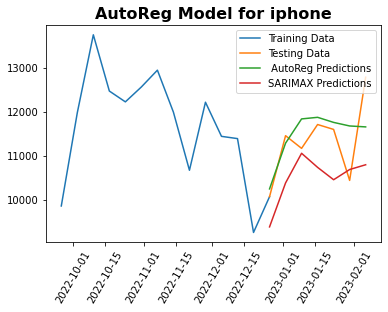

In [174]:
# Visualize the predictions
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Testing Data')
plt.plot(pred, label=' AutoReg Predictions')
plt.plot(predictions, label='SARIMAX Predictions')
plt.title('AutoReg Model for iphone', fontsize=16, fontweight='bold')
plt.xticks(rotation=60)
plt.legend()
plt.show()